<a href="https://colab.research.google.com/github/chris020589/Pytorch_SVM/blob/main/PytorchSVM_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
import pandas as pd
import pyarrow.csv as csv
import pyarrow.parquet as pq
from sklearn import svm
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
# 上傳csv檔案
uploaded = files.upload()

Saving pytorch_SVM2010.csv to pytorch_SVM2010.csv


In [3]:
data = pd.read_csv("pytorch_SVM2010.csv")

# 假設資料中包含特徵和標籤
# 'X'為特徵，'y'為標籤（目標變量）
X = data.drop("Return", axis=1)  # 將"target"替換為你的目標變量名稱
y = data["Return"]

# 將數據劃分為訓練集和測試集，80%訓練，20%測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 使用 StandardScaler 標準化資料
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 訓練 SVM 模型，使用 RBF 核
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')  # C是懲罰係數，gamma是RBF核的參數
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8645833333333334


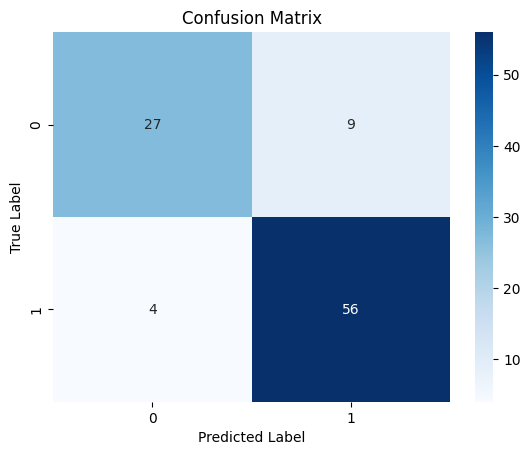

Precision: 0.8615384615384616
Recall: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.75      0.81        36
        True       0.86      0.93      0.90        60

    accuracy                           0.86        96
   macro avg       0.87      0.84      0.85        96
weighted avg       0.87      0.86      0.86        96



In [8]:
# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Precision 和 Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# 完整的分类报告
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)